In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/Cleaned/cleaned_data.csv")

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256640 entries, 0 to 256639
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             256640 non-null  object 
 1   solving_id            256640 non-null  int64  
 2   question_id           256640 non-null  object 
 3   user_answer           256630 non-null  object 
 4   user_id               256640 non-null  object 
 5   elapsed_time_seconds  256640 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 11.7+ MB


,solving_id,elapsed_time_seconds
count,256640.000000,256640.000000
mean,943.408911,24.531012
std,1171.770549,15.837848
min,1.000000,1.000000
25%,151.000000,15.333000
50%,521.000000,20.000000
75%,1312.000000,29.000000
max,7772.000000,108.800000


In [3]:
df.head(10)

,timestamp,solving_id,question_id,user_answer,user_id,elapsed_time_seconds
0,2019-08-06 12:56:30.868,1,q5012,b,u1,38.0
1,2019-08-06 12:57:01.062,2,q4706,c,u1,24.0
2,2019-08-06 12:58:13.432,3,q4366,b,u1,68.0
3,2019-08-06 12:58:59.668,4,q4829,a,u1,42.0
4,2019-08-06 13:00:01.774,5,q6528,b,u1,59.0
5,2019-08-06 13:01:03.370,6,q4793,a,u1,58.0
6,2019-08-06 13:01:41.746,7,q6488,a,u1,35.0
7,2019-08-06 13:11:41.361,8,q356,b,u1,23.0
8,2019-08-06 13:12:51.393,9,q1382,c,u1,22.0
9,2019-08-06 13:14:00.758,10,q830,b,u1,25.0


In [4]:
df['timestamp'] = pd.to_datetime(
    df['timestamp'],
    format='mixed',
    utc=True
)


In [5]:
df['timestamp'].dtype


datetime64[ns, UTC]

In [6]:
df['hour'] = df['timestamp'].dt.hour
df['day_name'] = df['timestamp'].dt.day_name()
df['date'] = df['timestamp'].dt.date


In [7]:
df.groupby('hour').size()


hour
0     11553
1     13021
2     12637
3     12163
4     10632
5     12906
6     12886
7     13477
8     12177
9     11929
10    11132
11    13740
12    15748
13    16441
14    13506
15     8766
16     5139
17     3120
18     2230
19     1860
20     1934
21     3572
22    11287
23    24784
dtype: int64

<Axes: title={'center': 'Solving Activity by Hour'}, xlabel='hour'>

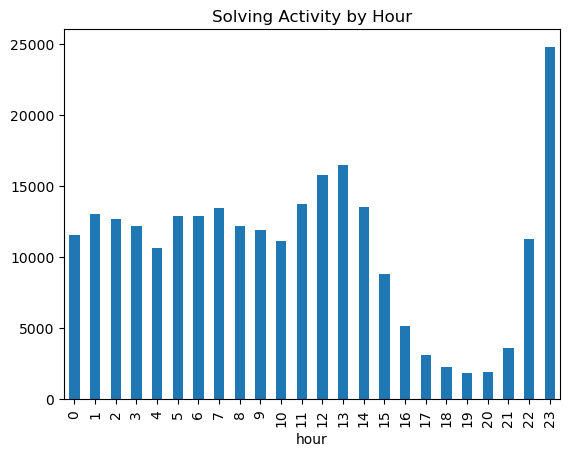

In [8]:
df.groupby('hour').size().plot(kind='bar', title='Solving Activity by Hour')


In [9]:
df['elapsed_time_seconds'].describe()


count    256640.000000
mean         24.531012
std          15.837848
min           1.000000
25%          15.333000
50%          20.000000
75%          29.000000
max         108.800000
Name: elapsed_time_seconds, dtype: float64

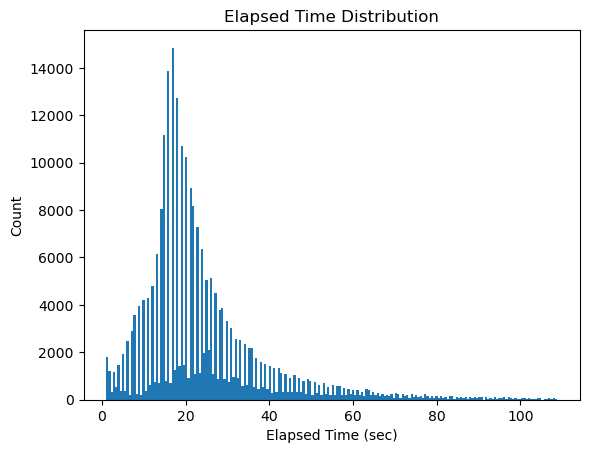

In [10]:
plt.hist(df['elapsed_time_seconds'], bins=200)
plt.xlabel("Elapsed Time (sec)")
plt.ylabel("Count")
plt.title("Elapsed Time Distribution")
plt.show()


In [11]:
df['elapsed_time_seconds'].quantile([0.9, 0.95, 0.99])


0.90    44.25
0.95    58.00
0.99    86.00
Name: elapsed_time_seconds, dtype: float64

In [12]:
THRESHOLD = 120
df_eda = df[df['elapsed_time_seconds'] <= THRESHOLD]


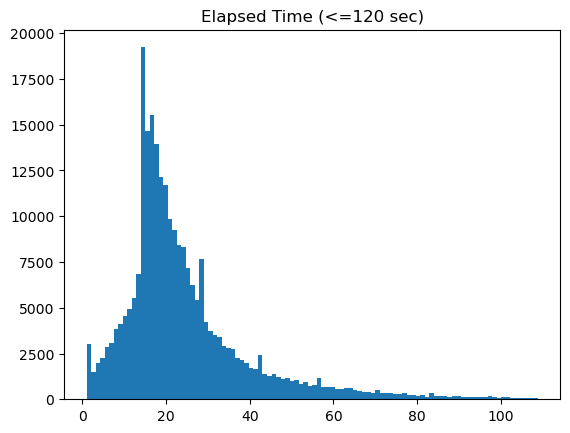

In [13]:
plt.hist(df_eda['elapsed_time_seconds'], bins=100)
plt.title("Elapsed Time (<=120 sec)")
plt.show()


In [14]:
user_attempts = df_eda.groupby('user_id').size()
user_attempts.describe()


count    1000.000000
mean      256.640000
std       720.375338
min         1.000000
25%        20.000000
50%        30.000000
75%        97.250000
max      7735.000000
dtype: float64

In [15]:
user_attempts.sort_values(ascending=False).head(10)


user_id
u10048     7735
u10041     6754
u10054     5620
u100567    4764
u1007      4718
u100901    4485
u100660    4396
u100711    4013
u10061     3868
u10067     3788
dtype: int64

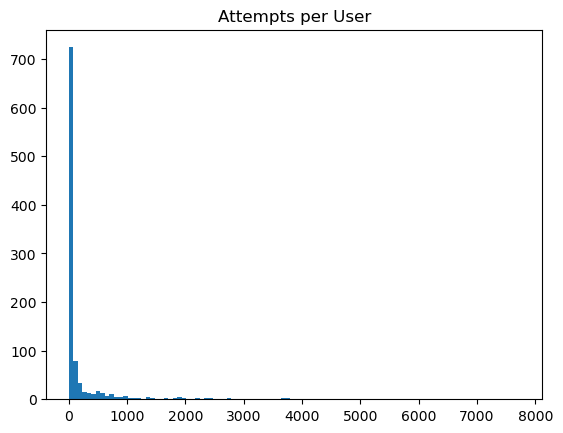

In [16]:
plt.hist(user_attempts, bins=100)
plt.title("Attempts per User")
plt.show()


In [17]:
user_speed = df_eda.groupby('user_id')['elapsed_time_seconds'].mean()
user_speed.describe()


count    1000.000000
mean       23.651531
std         7.200137
min         1.896483
25%        19.333308
50%        22.867330
75%        27.639955
max        60.439560
Name: elapsed_time_seconds, dtype: float64

In [18]:
question_stats = df_eda.groupby('question_id')['elapsed_time_seconds'].agg(['mean','median','count'])


In [19]:
question_stats.sort_values('mean', ascending=False).head(10)


,mean,median,count
question_id,,,
q17437,102.666,102.666,1
q17436,102.666,102.666,1
q17435,102.666,102.666,1
q17739,92.200,99.000,3
q17742,92.200,99.000,3
q17740,92.200,99.000,3
q17743,92.200,99.000,3
q17741,92.200,99.000,3
q17523,84.000,84.000,1


In [20]:
df['user_answer'].value_counts(normalize=True)

user_answer
b    0.285446
a    0.270654
c    0.265924
d    0.177976
Name: proportion, dtype: float64

In [21]:
df_eda[['elapsed_time_seconds', 'hour']].corr()


,elapsed_time_seconds,hour
elapsed_time_seconds,1.000000,-0.014462
hour,-0.014462,1.000000


In [22]:
user_attempts.describe()


count    1000.000000
mean      256.640000
std       720.375338
min         1.000000
25%        20.000000
50%        30.000000
75%        97.250000
max      7735.000000
dtype: float64

In [23]:
user_speed = df_eda.groupby('user_id')['elapsed_time_seconds'].mean()

user_profile = pd.concat([user_attempts, user_speed], axis=1)
user_profile.columns = ['attempts', 'avg_time']



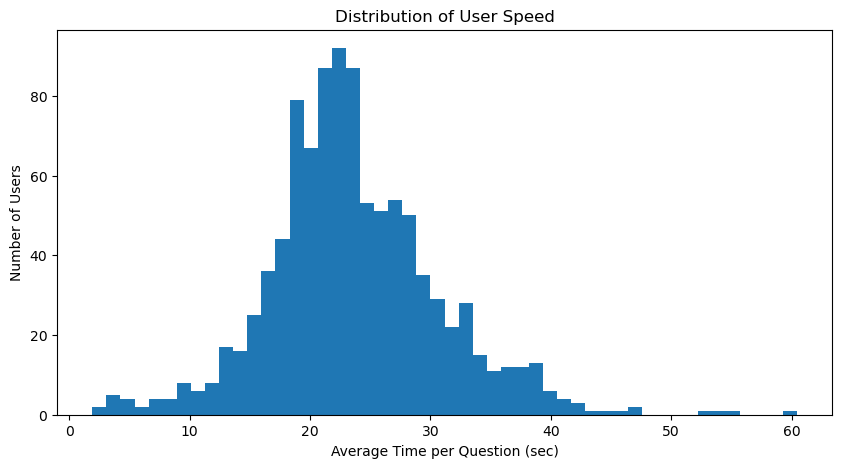

In [24]:
plt.figure(figsize=(10,5))
plt.hist(user_profile['avg_time'], bins=50)
plt.xlabel("Average Time per Question (sec)")
plt.ylabel("Number of Users")
plt.title("Distribution of User Speed")
plt.show()


In [25]:
# refinements for improve EDA 


In [26]:
# شيلنا الاسئله اللي الكونت بتاعها اقل من 5 لان المتوسط بتاعها مش موثوق 
question_stats_clean = question_stats[question_stats['count'] >= 5]
question_stats_clean = question_stats_clean.sort_values('mean', ascending=False)
question_stats_clean.head(10)


,mean,median,count
question_id,,,
q7309,81.527273,87.8,11
q7313,81.527273,87.8,11
q7310,81.527273,87.8,11
q7311,81.527273,87.8,11
q7312,81.527273,87.8,11
q7329,79.450000,72.5,5
q7330,79.450000,72.5,5
q7327,79.450000,72.5,5
q7328,79.450000,72.5,5


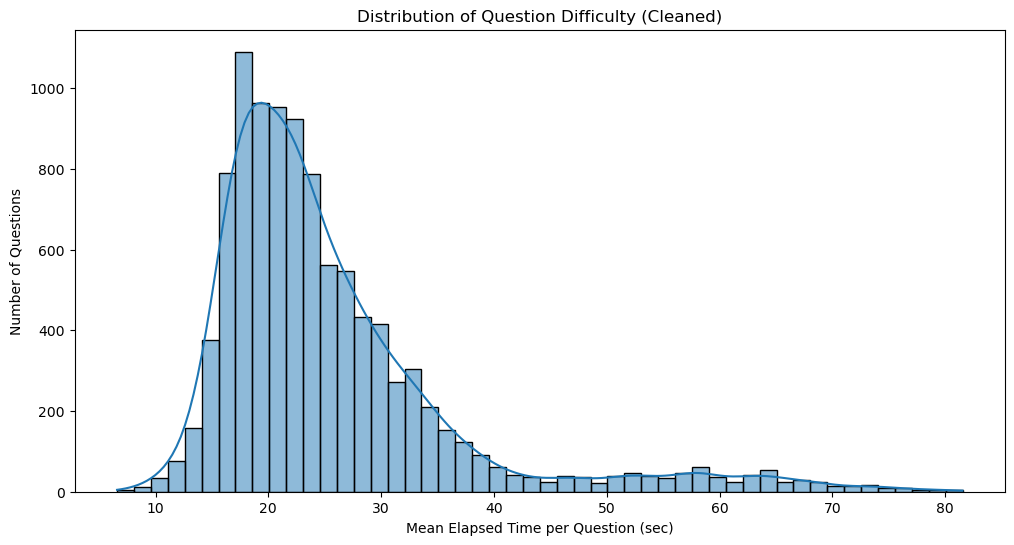

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(question_stats_clean['mean'], bins=50, kde=True)
plt.xlabel("Mean Elapsed Time per Question (sec)")
plt.ylabel("Number of Questions")
plt.title("Distribution of Question Difficulty (Cleaned)")
plt.show()


In [28]:
#   الهدف اني اقسم المستخدمين حسب السرعه و النشاط بتاعهم
def attempt_segment(x):
    if x < 30:
        return "Casual"
    elif x < 100:
        return "Normal"
    elif x < 500:
        return "Heavy"
    else:
        return "Extreme"

user_profile['attempt_segment'] = user_profile['attempts'].apply(attempt_segment)

# Segmentation by speed
def speed_segment(x):
    if x < 20:
        return "Fast"
    elif x < 30:
        return "Normal"
    else:
        return "Slow"

user_profile['speed_segment'] = user_profile['avg_time'].apply(speed_segment)


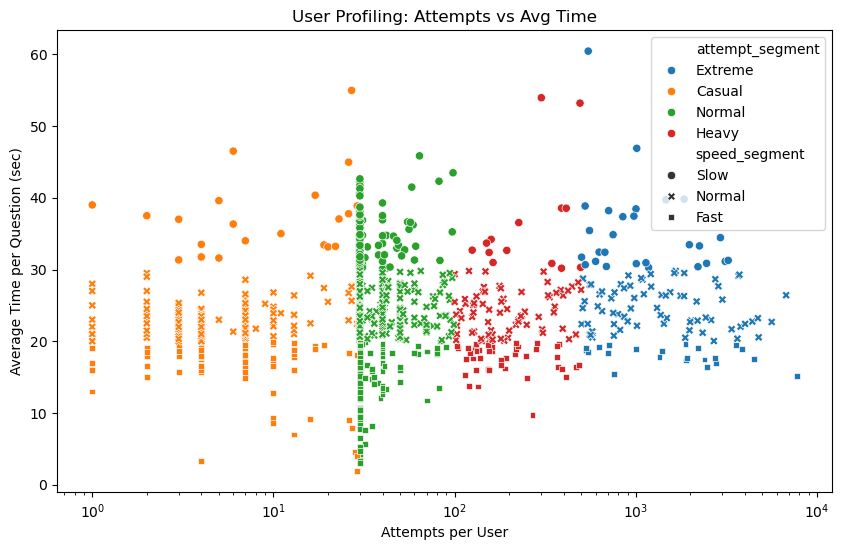

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=user_profile, x='attempts', y='avg_time', hue='attempt_segment', style='speed_segment')
plt.xlabel("Attempts per User")
plt.ylabel("Average Time per Question (sec)")
plt.title("User Profiling: Attempts vs Avg Time")
plt.xscale('log')  # optional for long-tail distribution
plt.show()


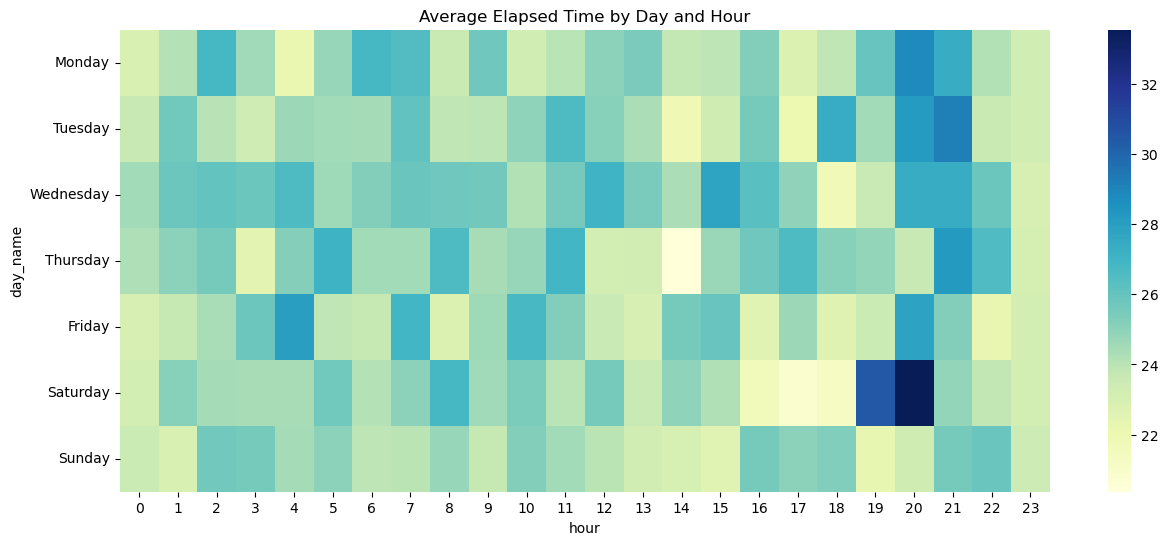

In [30]:
# الهدف اشوف نشاط المستخدمين خلال اليوم والاسبوع 
heatmap_data = df_eda.pivot_table(index='day_name', columns='hour', values='elapsed_time_seconds', aggfunc='mean')

days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(days_order)

plt.figure(figsize=(15,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Average Elapsed Time by Day and Hour")
plt.show()
